In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import george 
import astropy.table as at 
from george import kernels 
import scipy.interpolate as interp 

In [14]:
dat_ps1_g = at.Table.read('2020jfo_ps1_g.dat', format='ascii', data_start=2, names=('mjd','mag','err','pb', 'magsys'))

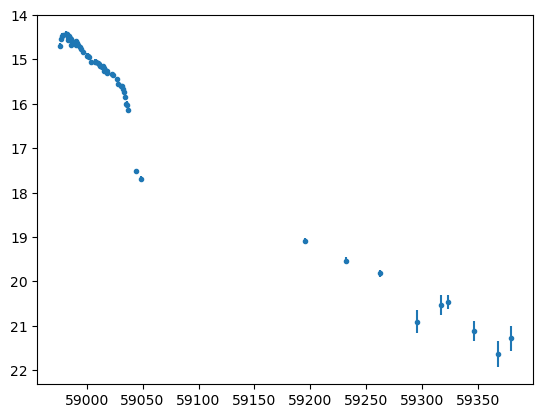

In [4]:
fig = plt.figure()
ax = fig.add_subplot()
ax.errorbar(dat_ps1_g['mjd'], dat_ps1_g['mag'], dat_ps1_g['err'], linestyle='None', marker='.')
ax.invert_yaxis()

In [16]:
x_ps1g = dat_ps1_g['mjd']
y_ps1g = dat_ps1_g['mag']
yerr_ps1g = dat_ps1_g['err']

f_ps1g = interp.interp1d(x_ps1g, y_ps1g, kind='linear')

class mean_function:
    def __init__(self, f):
        self.f = f
    def get_value(self, x):
        return self.f(x)
    

meanf_ps1g = mean_function(f_ps1g)

In [6]:
kernel = (np.mean(yerr)**2.) * kernels.Matern32Kernel(1e6)
gp = george.GP(mean=meanf, kernel=kernel)
gp.compute(x, yerr)
x_pred = np.linspace(x.min(), x.max(), 700)
y_mean = f(x_pred)
pred, pred_var = gp.predict(y, x_pred, return_var=True)



    

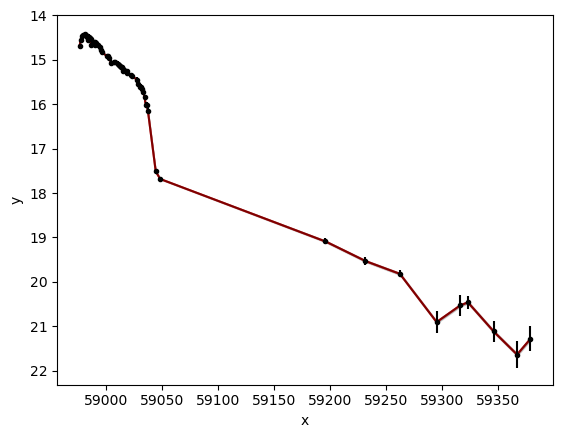

In [7]:
plt.figure()
plt.fill_between(x_pred, pred - np.sqrt(pred_var), pred + np.sqrt(pred_var),
                color="k", alpha=0.2)
plt.plot(x_pred, y_mean, 'r-')
plt.plot(x_pred, pred, "k", lw=1.5, alpha=0.5)
plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
plt.xlabel("x")
plt.ylabel("y")

#plt.xlim(x.min(), x.min() + 50)
plt.gca().invert_yaxis()

plt.show()